# What is PyMove

PyMove is an open source Python library for handling trajectory data.
To use PyMove, we must first, through the terminal, clone the repository that has the project, in this case: https://github.com/InsightLab/PyMove.
After that, the next instructions to be executed in the terminal are:

1) Make a branch developer:

`git branch developer`

2) Switch to a new branch

`git checkout developer`

3) Make a pull of branch

`git pull origin developer`

4) Switch to folder PyMove

`cd PyMove`

5) Install in developer mode

`make dev`

And finally, to use PyMove, just import the library:

`import pymove`

PyMove allows you to handling trajectory data with grid, prepocessing and data vizualization



---



# Exploring MoveDataFrame

MoveDataFrame is a data structure that manipulates the structure the user wants.
They currently have two concrete classes that implement the scope-delimiting interface that the new implementing classes must have. These classes are PandasMoveDataFrame and DaskMoveDataFrame which use Pandas and Dask respectively to manipulate the data.

MoveDataFrame contains the columns:
- `lat`: represents the latitude of the point.
- `lon`: represents the longitude of the point.
- `datetime`: represents the date and time of the point.

---

## Creating a MoveDataFrame

Is it possible to create a MoveDataFrame from a list, a dictionary, from a Pandas DataFrame or by reading a file.

> Importing the pymove library

In [1]:
import pymove as pm
from pymove import MoveDataFrame

> To create a MoveDataFrame from a list:

In [2]:
list_data = [
    [39.984094, 116.319236, '2008-10-23 05:53:05', 1],
    [39.984198, 116.319322, '2008-10-23 05:53:06', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1]
]
move_df = MoveDataFrame(data=list_data, latitude="lat", longitude="lon", datetime="datetime", traj_id="id")
move_df.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984224,116.319402,2008-10-23 05:53:11,1
4,39.984224,116.319402,2008-10-23 05:53:11,1


> From a dict:

In [3]:
dict_data = {
    'lat': [39.984198, 39.984224, 39.984094],
    'lon': [116.319402, 116.319322, 116.319402],
    'datetime': ['2008-10-23 05:53:11', '2008-10-23 05:53:06', '2008-10-23 05:53:06']
}

move_df = MoveDataFrame(data=dict_data, latitude="lat", longitude="lon", datetime="datetime", traj_id="id")
move_df.head()

,lat,lon,datetime
0,39.984198,116.319402,2008-10-23 05:53:11
1,39.984224,116.319322,2008-10-23 05:53:06
2,39.984094,116.319402,2008-10-23 05:53:06


When creating a Movie DataFrame from a file, the default flag is Pandas but we can also create it with Dask.

---

## What's in MoveDataFrame?

* The data type when instantiated is **pandas**.
* It has the columns `lat`, `lon`, `datetime` and `id`.
* The data types of the attributes of the `lat`, `lon`, `datetime` and `id` columns are respectively `float`, `float`, `datetime` and `int`.

---

## Some functions

MoveDataFrame has some functions that allow us to:

* See information about the trajectory, information such as number of points, number of object IDs, start date and end date and bounding Box.
* View the number of users
* Perform the transformation for Numpy, dicts, DataFrames and even from Pandas - which by default our MoveDataFrame is created - to Dask.
* It is also possible to write files and turn them into csv files.
* Create a virtual grid
* View information about the MoveDataFrame operation
* Get data bound box

Another interesting feature of MoveDataFrame is the creation of columns for specific purposes, for example:
* tid: trajectory id based on ld and datetime.

* date: extract date on datetime.

* hour: extract hour on datetime.

* day: day of the week from datatime.

* period: time of day or period from datatime.

* dist_to_prev, time_to_prev, speed_to_prev: distance, time and speed from 
previous point.

* dist_to_prev, dist_to_next, dist_prev_to_next: distance in meters from the 
previous point to the current point, from the current point to the next point, and from the previous point to the next point.

* time_to_prev, time_to_next, time_prev_to_next: time in seconds from the previous point to the current point, from the current point to the next point, and from the previous point to the next point.

* speed_to_prev, speed_to_next, speed_prev_to_next: speed in meters by seconds from the previous point to the current point, from the current point to the next point, and from the previous point to the next point.

* column that informs the movement or stop of the point.

* return time difference between max and min datetime in trajectory data.

---

# Exploring Preprocessing

Data pre-processing is a set of activities that prepares data for future analysis and data mining activities.

## Filtering

The filter module has several functions to perform different types of data filtering.

To import the module:

In [4]:
from pymove import filters



> `by_bbox`: It is an area that is defined by the values passed that represent two longitudes and two latitudes in the bounding box. The by_bbox function delimits the trajectory points based on the area defined by the bounding box.


> `by_datetime`: filters the trajectory points according to the values passed as a parameter, in the arguments "start_datetime" and "end_datetime".


> `by_label`: filters the points of the trajectories that satisfy the value passed as argument "value", in addition, the function has as parameter the argument "label_name" that specifies the column label.


> `by_id`: filters the trajectory points that have the same id passed as the value of the "id" argument in the function.


> `by_tid`: function that filters the points of the trajectories that match the value specified in the function, this value represents a concatenation between the id and date of a trajectory.


> `clean_consecutive_duplicates`: function that removes duplicate rows from the DataFrame. It can be considered only one column if it is specified in the "subset" parameter in the function.


> `clean_gps_jumps_by_distance`: function removes from the dataframe the trajectories points that are outliers.


> `clean_gps_nearby_points_by_distances`: remove points from the trajectory that have the distance between them and the previous point lower than the value passed to the parameter "radius_area".


> `clean_gps_nearby_points_by_speed`: remove points from the trajectory that have the speed of travel between them and the point before, lower than the value passed to the parameter "speed_radius".


> `clean_gps_speed_max_radius`: recursively remove points with speed higher than what is passed as a parameter in the function.


> `clean_trajectories_with_few_points`: function removes from the given dataframe, trajectories with fewer points than was specified by the parameter min_points_per_trajectory.

---

## Segmentation

The segmentation module is used to segment trajectories based on different parameters.

Importing the module:

In [5]:
from pymove import segmentation



> `bbox_split`: function splits the bounding box in grids of the same size. The number of grids is chosen by assigning value to the "number_grids" parameter.


> `by_dist_time_speed`: Segments trajectories based on distance, time and speed.


> `by_max_dist`: function segments the trajectories, based on distance.


> `by_max_time`: function segments the trajectories, based on time.


> `by_max_speed`: function segments the trajectories, based on speed.

---

## Stay point detection

A stay point is the place where an object has remained for a certain time without traveling more than the established distance.

Importing the module:

In [6]:
from pymove import stay_point_detection



> `create_or_update_move_stop_by_dist_time`: indicates stay points based on distance and time values passed as function parameters.

> `create_or_update_move_and_stop_by_radius`: function creates or updates the stay points of the trajectories, based on distance.

---

## Compression

Importing the module:

In [7]:
from pymove import compression



> `compress_segment_stop_to_point`: reduces the path size. Breakpoints are used for compression.

---

# Exploring Visualization

Pymove has a module that facilitates visual analysis of data. This makes use of the Matplotlib and Folium libraries.

Importing:

In [8]:
import pymove as pm
from pymove.visualization import folium as f, matplotlib as mpl
from pymove.utils import visual

---

## Exploring visualization module

There are the following functions to generate random colors to improve the visibility of graphics:

In [9]:
visual.generate_color()

'#6B8E23'

Passing the intensity of each color will generate an rgb color.

In [10]:
visual.rgb([0.6, 0.2, 0.2])

(51, 51, 153)

To generate colors in hex codes:

In [11]:
visual.hex_rgb([0.6, 0.2, 0.2])

'#333399'

In [12]:
list_data = [
    [39.984094, 116.319236, '2008-10-23 05:53:05', 1],
    [39.984198, 116.319322, '2008-10-23 05:53:06', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1]
]
move_df = MoveDataFrame(data=list_data, latitude="lat", longitude="lon", datetime="datetime", traj_id="id")
move_df.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984224,116.319402,2008-10-23 05:53:11,1
4,39.984224,116.319402,2008-10-23 05:53:11,1


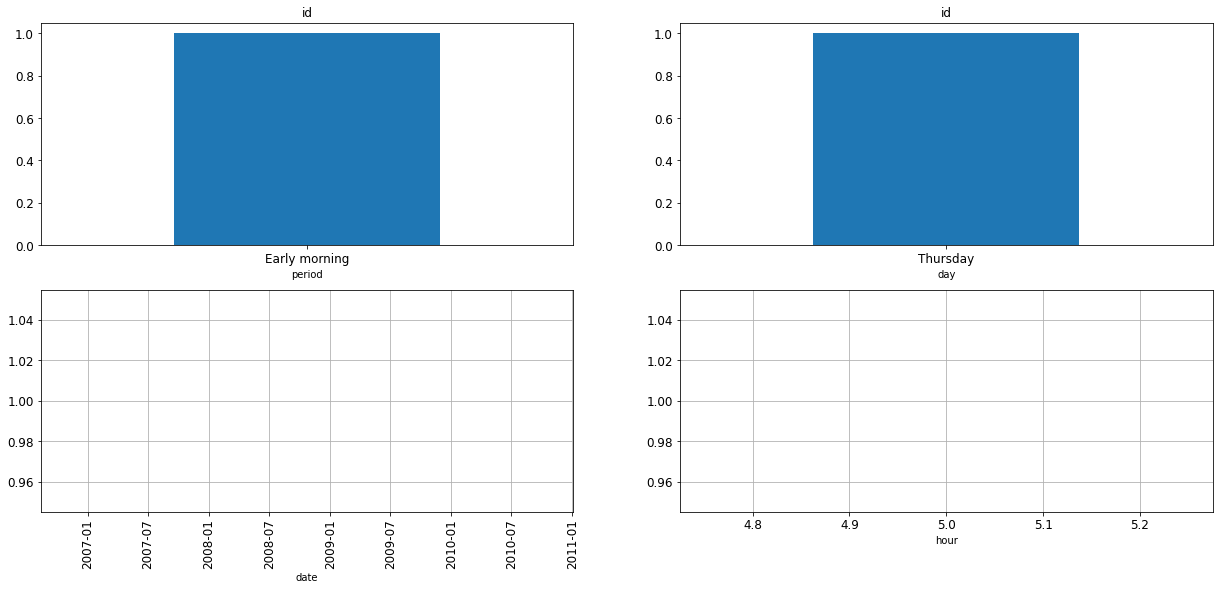

In [13]:
mpl.show_object_id_by_date(move_df, return_fig=False)

The above function generates four graphs representing the date distribution based on period, time, date and day of the week.

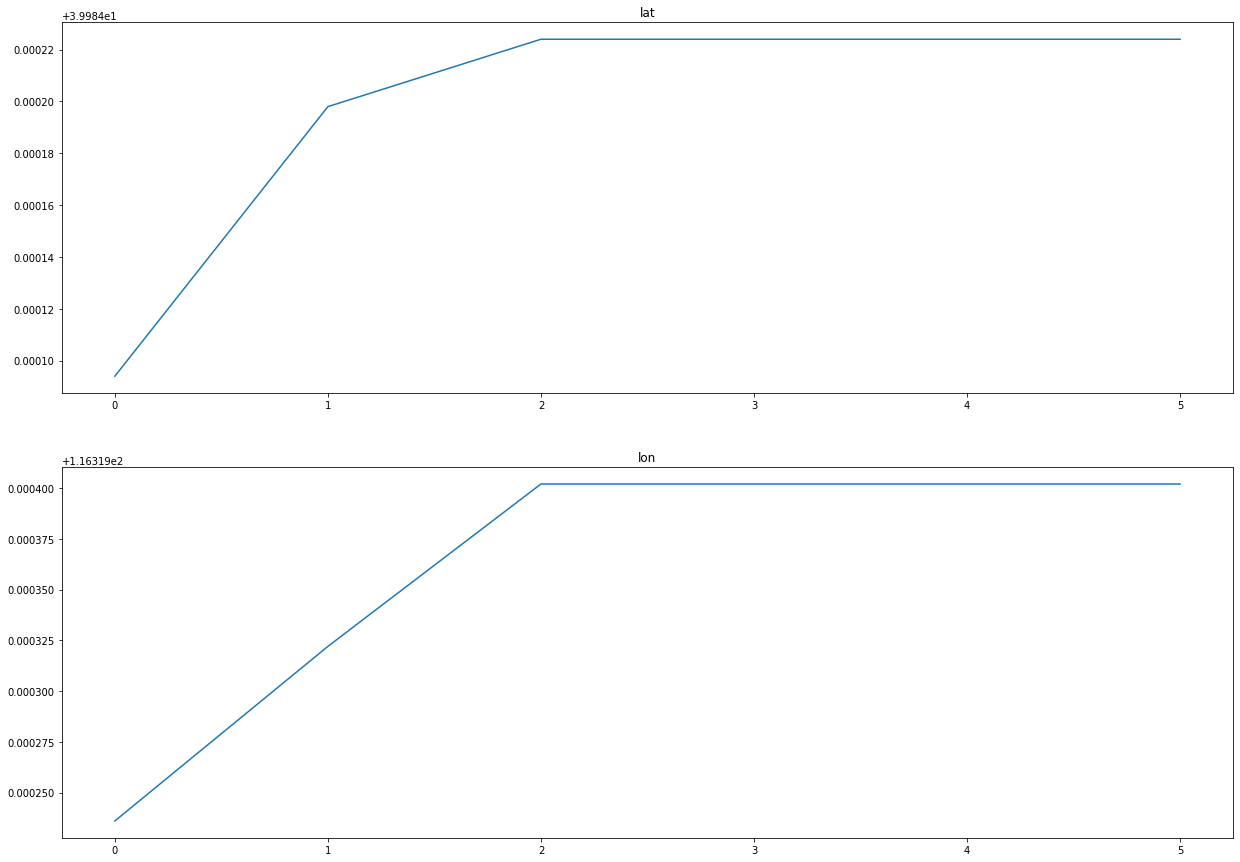

In [14]:
mpl.plot_all_features(move_df, return_fig=False)

The function above informs the variation of the point in the trajectory considering the columns "lon" and "lat".

We can visualize the trajectories by filtering by:



> Day week



In [15]:
f.plot_trajectory_by_day_week(move_df, 'Thursday')



> Period of day



In [16]:
f.plot_trajectory_by_period(move_df, 'Early morning')



> Period of time with start date and end date



In [17]:
f.plot_trajectory_by_date(move_df.head(10), '2008-01-01', '2008-10-23')

---

## Exploring trajectories



> Plot all trajectories



In [18]:
f.plot_trajectories(move_df)



> Plot trajectory by id. You can also customize the visualization color with the "color" parameter.



In [19]:
f.plot_trajectory_by_id(move_df, 1, color="orange")



> Heat map that indicates where the point is most concentrated during the trajectory.



In [20]:
f.heatmap(move_df)



> Heat map with time



In [21]:
f.heatmap_with_time(move_df)



> Plot cluster. Indicates the number of points interactively per location.



In [22]:
f.cluster(move_df, 1000)

When clicking on a cluster, the position per point is indicated by the red dot.

In [23]:
f.faster_cluster(move_df)



> Plot stops points



In [24]:
move_df.generate_tid_based_on_id_datetime()
move_df.generate_move_and_stop_by_radius()

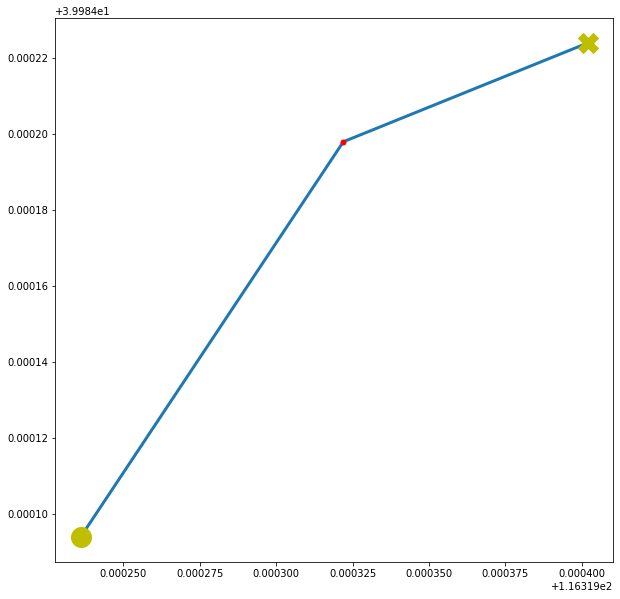

In [25]:
mpl.plot_trajectory_by_id(move_df, id_="12008102305", label='tid', feature="situation", value="stop", return_fig=False)

In [26]:
f.plot_stops(move_df, n_rows=2000)



> Show lat and lon GPS



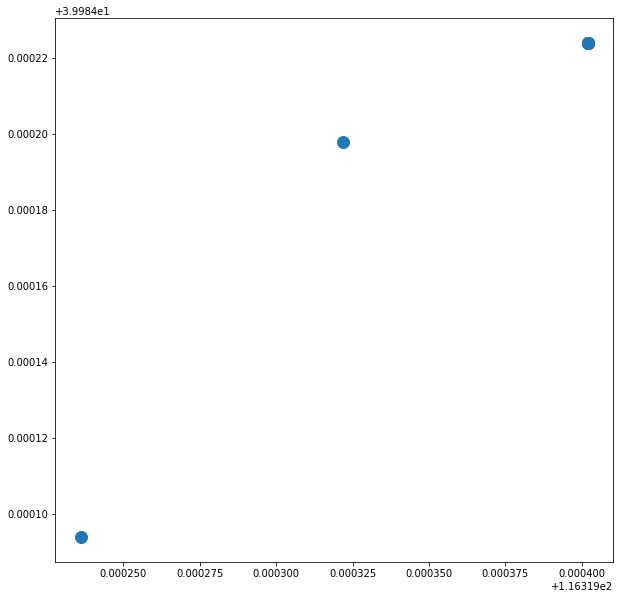

In [27]:
mpl.plot_trajectories(move_df, return_fig=False)

In [28]:
f.plot_markers(move_df, n_rows=400, zoom_start=13.5)